# ASSOCIATION RULES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import association_rules,apriori

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load dataset
df = pd.read_excel('Online retail.xlsx')
df.columns = ['Items']
df.head()

,Items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Items   7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [5]:
df.isnull().sum()

Items    0
dtype: int64

In [6]:
df.shape

(7500, 1)

# Preparing a new dataset

In [8]:
# Convert each transaction (comma-separated items) into a list
transactions = df[df.columns[0]].dropna().apply(lambda x: x.split(','))

# Preview first few transactions
transactions

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: Items, Length: 7500, dtype: object

In [9]:
# Get the unique items in all transactions
unique_items = sorted(list(set(item for transaction in transactions for item in transaction)))
print(unique_items)

[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mineral wa

In [10]:
len(unique_items)

120

In [11]:
### nan to remove
if 'nan' in unique_items :
    unique_items.remove('nan')
### there is no nan in data

In [12]:
# pip install mlxtend

In [13]:
# Transform using TransactionEncoder
# from mlxtend.preprocessing import TransactionEncoder

# te = TransactionEncoder()
# te_ary = te.fit(transactions).transform(transactions)

In [14]:
# Convert transactions into a one-hot encoded DataFrame
one_hot_encoded_df = pd.DataFrame(0,index=range(len(transactions)),columns=unique_items)
for i,transaction in enumerate(transactions):
    for item in transaction:
        one_hot_encoded_df.at[i, item.strip()] = 1
# Apply the Apriori algorithm
min_support = 0.01  # Minimum support threshold
frequent_items = apriori(one_hot_encoded_df, min_support=min_support, use_colnames=True)
print(frequent_items)

      support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (mineral water, ground beef, milk)
255  0.017067  (spaghetti, mineral water, ground beef)
256  0.015733         (spaghetti, mineral water, milk)
257  0.010267    (spaghetti, mineral water, olive oil)
258  0.011467     (spaghetti, mineral water, pancakes)

[259 rows x 2 columns]


In [15]:
# Generate rules with min confidence 0.3 and lift > 1
rules = association_rules(frequent_items, metric="lift", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,1.0,0.003556,1.015680,0.407144,0.044103,0.015438,0.196753
1,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,1.0,0.004398,1.058068,0.420154,0.073129,0.054881,0.136473
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,1.0,0.004398,1.063185,0.417349,0.073129,0.059430,0.136473
4,(burgers),(chocolate),0.087200,0.163867,0.017067,0.195719,1.194377,1.0,0.002777,1.039603,0.178291,0.072934,0.038094,0.149934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,1.0,0.005462,1.397744,0.488682,0.045503,0.284561,0.251576
432,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,1.0,0.005593,1.251163,0.504751,0.058384,0.200744,0.202885
433,(spaghetti),"(mineral water, pancakes)",0.174133,0.033733,0.011467,0.065850,1.952073,1.0,0.005593,1.034381,0.590560,0.058384,0.033238,0.202885
434,(mineral water),"(spaghetti, pancakes)",0.238267,0.025200,0.011467,0.048125,1.909736,1.0,0.005462,1.024084,0.625373,0.045503,0.023518,0.251576


In [16]:
# Filter rules with higher confidence and lift
rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] >= 3)]

# Display top rules
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
242,(herb & pepper),(ground beef),0.049467,0.098267,0.016,0.32345,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136


In [17]:
# Display the resulting rules
print("Frequent Items:\n",frequent_items)
print("\nAssociation Rules:\n",rules)
# Analyze the top 10 rules (you can adjust the number)
top_rules = rules.head(10) ####  (i.e., the 10 with highest lift)
print("\nTop 10 Association Rules:\n",top_rules)

Frequent Items:
       support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (mineral water, ground beef, milk)
255  0.017067  (spaghetti, mineral water, ground beef)
256  0.015733         (spaghetti, mineral water, milk)
257  0.010267    (spaghetti, mineral water, olive oil)
258  0.011467     (spaghetti, mineral water, pancakes)

[259 rows x 2 columns]

Association Rules:
          antecedents    consequents  antecedent support  consequent support  \
242  (herb & pepper)  (ground beef)            0.049467            0.098267   

     support  confidence      lift  representativity  leverage  conviction  \
242    0.016     0.32345  3.291555       

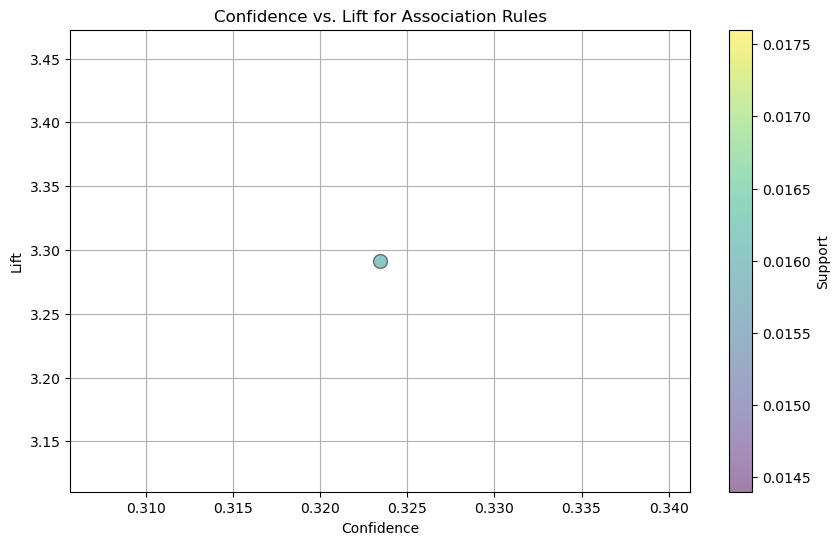

In [18]:
# Assuming 'rules' is your DataFrame containing association rules
# You can adjust the plot based on what you want to visualize
## Plotting confidence vs. lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'],alpha=0.5,c=rules['support'],cmap='viridis',s=100,edgecolors='k')
plt.colorbar(label='Support')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift for Association Rules')
plt.grid(True)
plt.show();

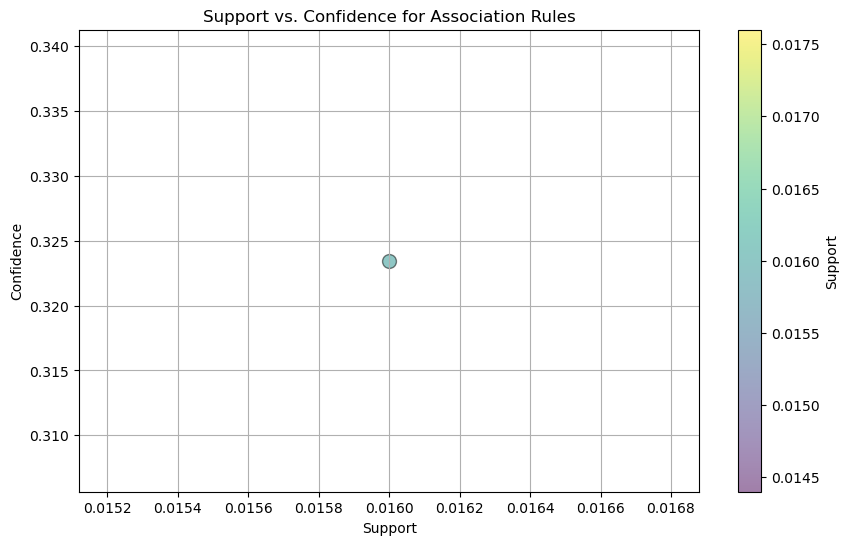

In [19]:
## Plotting support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5,c=rules['support'],cmap='viridis',s=100,edgecolors='k')
plt.colorbar(label='Support')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show();

# Interview Questions

### 1. What is Lift and why is it important in Association Rules?
- Lift measures the strength of an association between two items. It shows how much more likely items A and B occur together than if they were independent.

### 2. What is Support and Confidence? How do you calculate them?
-  Support - It tells how frequently a rule or itemset appears in the dataset.
- Confidence - It shows the likelihood of buying B given that A was bought.

### 3. What are some Limitations or Challenges of Association Rule Mining?
- Too many rules: Can generate thousands of rules, many of which are not useful.
- Sparse data: Large itemsets but low overlap may yield weak rules.
-  Scalability: Becomes computationally expensive for large datasets.